In [2]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/content/Merged_All_Data.csv"
df = pd.read_csv(file_path)

In [3]:
#read the 10 row
df.head(10)


review_id  student_id  instructor_id  course_id  \
0          1        2889             21         69   
1          2        2581             46        130   
2          3         344             48         20   
3          4           2             70        145   
4          5        1668             48         58   
5          6        2912             35         15   
6          7        1235             45         34   
7          8        2195             20         23   
8          9        2016              3        124   
9         10         709             18         76   

                                         review_text review_date  \
0  The instructor was very clear and made the cou...    3/4/2025   
1      Too fast-paced and lacked clear explanations.  10/11/2024   
2  Not engaging at all. I struggled to stay focus...    3/5/2025   
3  The instructor was fine, but the pace felt a b...   5/20/2024   
4  The course was okay, but I expected more pract...   3/28/2025   
5  The instructor was hard to follow and rarely r...   11/5/2024   
6  The course structure and delivery exceeded my ...    9/2/2024   
7  Excellent pacing and real-world examples. High...   5/12/2025   
8  Neither bad nor great – just an average learni...   6/28/2024   
9  Excellent pacing and real-world examples. High...  10/14/2024   

   rating_score  response_time sentiment_label         region  ...  \
0             5          17.74        Positive  South America  ...   
1             2          10.87        Negative  South America  ...   
2             1           4.10        Negative  South America  ...   
3             3          66.74         Neutral         Europe  ...   
4             3          29.10         Neutral           Asia  ...   
5             1          39.94        Negative           Asia  ...   
6             5          28.86        Positive         Africa  ...   
7             4          53.46        Positive  North America  ...   
8             3          43.61         Neutral  South America  ...   
9             5          67.23        Positive           Asia  ...   

           full_name                       country  experience_years  \
0       Anita Murphy                     Indonesia                 7   
1        Chad Barron                       Belgium                18   
2  Kenneth Hernandez                         Congo                13   
3       Janice Perez                      Cambodia                 7   
4  Kenneth Hernandez                         Congo                13   
5       Roger Bailey  Svalbard & Jan Mayen Islands                11   
6   Cheyenne Manning     Saint Pierre and Miquelon                15   
7   Jessica Mitchell                         Italy                18   
8      Melissa Evans                         Malta                 9   
9     Adam Henderson                   Afghanistan                20   

  course_count avg_response_time                                  title  \
0            4             23.86          Horizontal didactic structure   
1            1              5.26             Enhanced web-enabled frame   
2            4             32.77  Triple-buffered asymmetric neural-net   
3            3             22.64           Monitored mobile utilization   
4            4             32.77       Upgradable intermediate approach   
5            2              7.57     Multi-tiered 6thgeneration circuit   
6            5             41.54           Automated analyzing software   
7            4              7.91       Object-based composite help-desk   
8            4             37.82    Programmable 3rdgeneration analyzer   
9            3             36.99         Function-based global software   

       category  language duration_hours         level  
0        Health   English           33.7  Intermediate  
1      Business   Spanish           14.1      Beginner  
2      Creative    German           35.3  Intermediate  
3      Business    French           10.4 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_id           10000 non-null  int64  
 1   student_id          10000 non-null  int64  
 2   instructor_id       10000 non-null  int64  
 3   course_id           10000 non-null  int64  
 4   review_text         10000 non-null  object 
 5   review_date         10000 non-null  object 
 6   rating_score        10000 non-null  int64  
 7   response_time       10000 non-null  float64
 8   sentiment_label     10000 non-null  object 
 9   region              10000 non-null  object 
 10  device_type         10000 non-null  object 
 11  completed_courses   10000 non-null  int64  
 12  satisfaction_score  10000 non-null  float64
 13  full_name           10000 non-null  object 
 14  country             10000 non-null  object 
 15  experience_years    10000 non-null  int64  
 16  cours

#📌 1. Importing Libraries & Loading Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/Merged_All_Data.csv")


#📌 2. Basic Dataset Overview

In [6]:
# Shape and column info
print("Shape of data:", df.shape)
print("\nColumn Info:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))


Shape of data: (10000, 23)

Column Info:
 review_id               int64
student_id              int64
instructor_id           int64
course_id               int64
review_text            object
review_date            object
rating_score            int64
response_time         float64
sentiment_label        object
region                 object
device_type            object
completed_courses       int64
satisfaction_score    float64
full_name              object
country                object
experience_years        int64
course_count            int64
avg_response_time     float64
title                  object
category               object
language               object
duration_hours        float64
level                  object
dtype: object

Missing Values:
 review_id             0
student_id            0
instructor_id         0
course_id             0
review_text           0
review_date           0
rating_score          0
response_time         0
sentiment_label       0
region              

#📌 3. Date Conversion & New Columns

In [7]:
# Convert review_date to datetime
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

# Create new features: Year, Month, Day of week
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month
df['review_dayofweek'] = df['review_date'].dt.day_name()


#📌 4. Distribution of Ratings

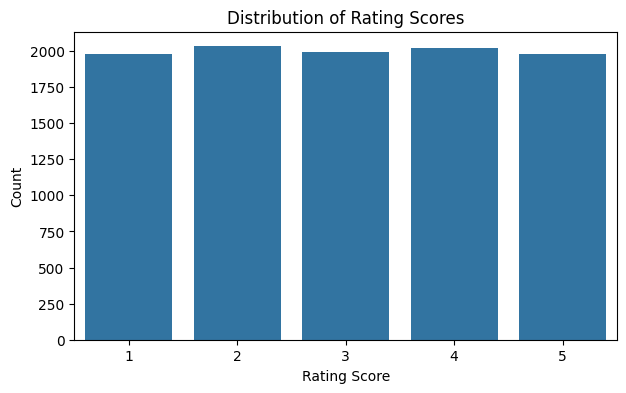

In [8]:
plt.figure(figsize=(7,4))
sns.countplot(x='rating_score', data=df)
plt.title("Distribution of Rating Scores")
plt.xlabel("Rating Score")
plt.ylabel("Count")
plt.show()


#📌 5. Sentiment Label Breakdown

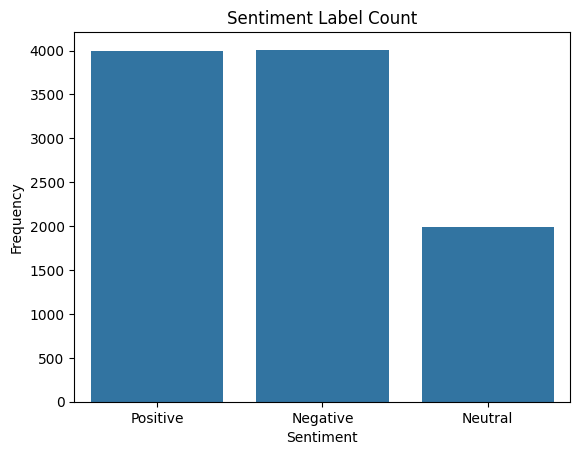

In [10]:
sns.countplot(x='sentiment_label', data=df)
plt.title("Sentiment Label Count")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()


#📌 6. Ratings vs Sentiment

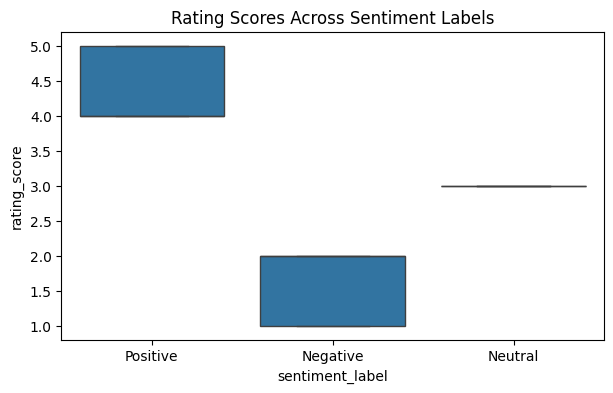

In [11]:
plt.figure(figsize=(7,4))
sns.boxplot(x='sentiment_label', y='rating_score', data=df)
plt.title("Rating Scores Across Sentiment Labels")
plt.show()


#📌 7. Device Type Usage

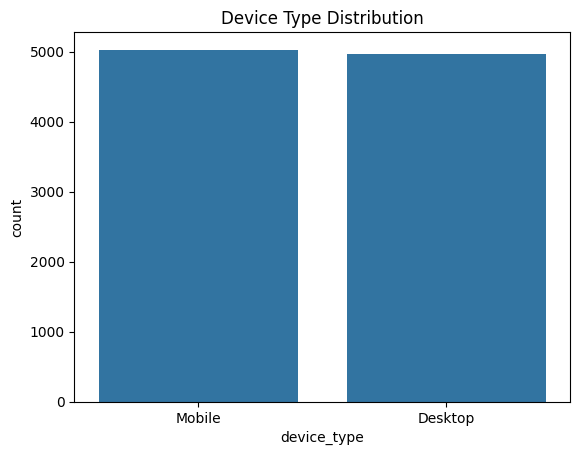

In [12]:
sns.countplot(data=df, x='device_type', order=df['device_type'].value_counts().index)
plt.title("Device Type Distribution")
plt.show()


#📌 8. Region-wise Review Count

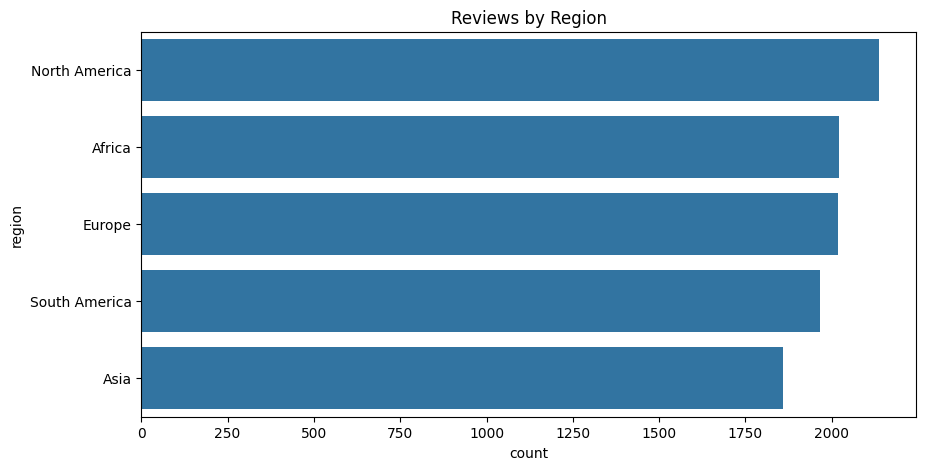

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='region', order=df['region'].value_counts().index)
plt.title("Reviews by Region")
plt.show()


#📌 9. Rating Score vs Satisfaction Score

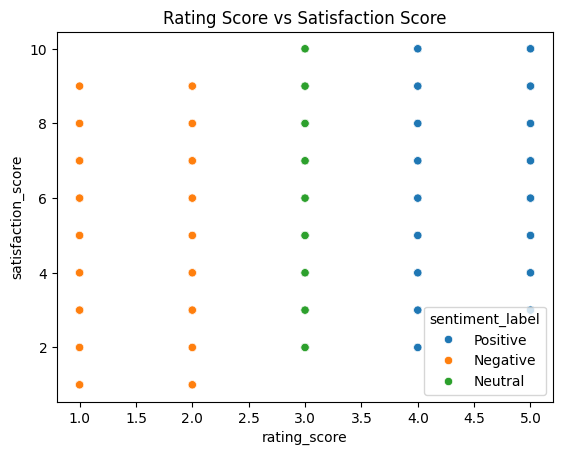

In [14]:
sns.scatterplot(data=df, x='rating_score', y='satisfaction_score', hue='sentiment_label')
plt.title("Rating Score vs Satisfaction Score")
plt.show()


#📌 10. Course Duration vs Rating Score

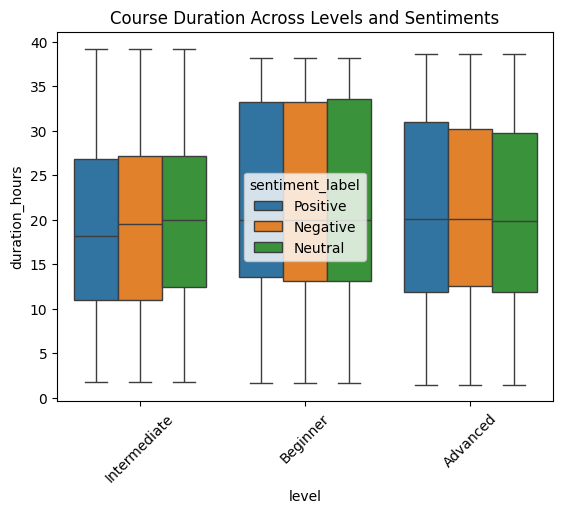

In [15]:
sns.boxplot(data=df, x='level', y='duration_hours', hue='sentiment_label')
plt.title("Course Duration Across Levels and Sentiments")
plt.xticks(rotation=45)
plt.show()


#📌 11. Correlation Heatmap

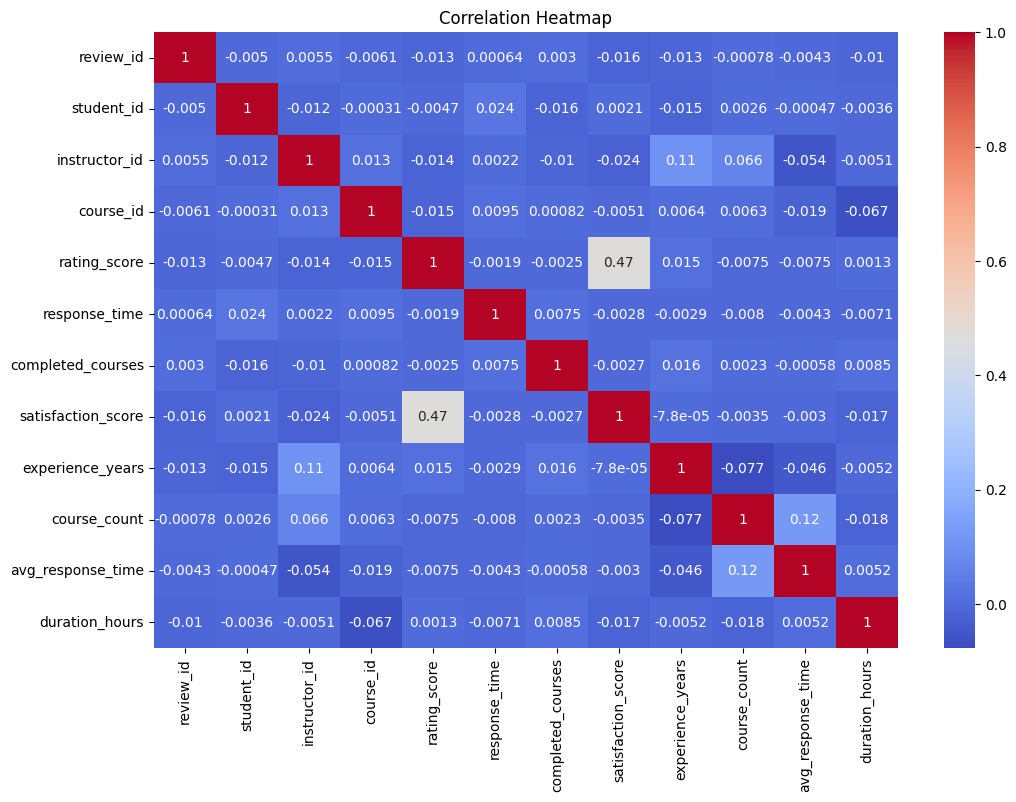

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#📌 12. Top Instructors by Average Rating

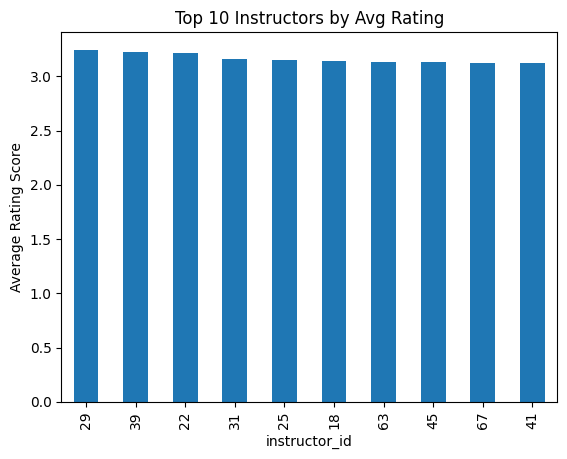

In [17]:
top_instructors = df.groupby('instructor_id')['rating_score'].mean().sort_values(ascending=False).head(10)
top_instructors.plot(kind='bar', title='Top 10 Instructors by Avg Rating')
plt.ylabel("Average Rating Score")
plt.show()


# Perform feature engineering steps on the dataset

In [18]:
# Perform feature engineering steps on the dataset

# Feature 1: Length of the review text
df['review_length'] = df['review_text'].apply(lambda x: len(str(x)))

# Feature 2: Word count in the review
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))

# Feature 3: Average response deviation (difference between response_time and avg_response_time)
df['response_time_deviation'] = df['response_time'] - df['avg_response_time']

# Feature 4: Rating to Satisfaction ratio
df['rating_satisfaction_ratio'] = df['rating_score'] / (df['satisfaction_score'] + 1e-5)  # avoid division by zero

# Feature 5: Experience per course
df['experience_per_course'] = df['experience_years'] / (df['course_count'] + 1e-5)

# Feature 6: Rating per hour of course
df['rating_per_hour'] = df['rating_score'] / (df['duration_hours'] + 1e-5)

# Feature 7: Satisfaction per hour
df['satisfaction_per_hour'] = df['satisfaction_score'] / (df['duration_hours'] + 1e-5)

# Preview the engineered features
df[[
    'review_length', 'word_count', 'response_time_deviation',
    'rating_satisfaction_ratio', 'experience_per_course',
    'rating_per_hour', 'satisfaction_per_hour'
]].describe()


review_length    word_count  response_time_deviation  \
count   10000.000000  10000.000000             10000.000000   
mean       57.730000      9.020800                12.400070   
std         7.029754      1.796522                24.494453   
min        45.000000      6.000000               -46.140000   
25%        55.000000      7.000000                -5.742500   
50%        60.000000     10.000000                12.480000   
75%        60.000000     10.000000                30.500000   
max        69.000000     12.000000                68.760000   

       rating_satisfaction_ratio  experience_per_course  rating_per_hour  \
count               10000.000000           10000.000000     10000.000000   
mean                    0.543544               4.206209         0.243064   
std                     0.254599               3.950637         0.357844   
min                     0.111111               0.200000         0.025510   
25%                     0.333333               1.799996         0.083799   
50%                     0.499999               2.749993         0.142180   
75%                     0.714285               5.999980         0.252101   
max                     1.999990              18.999810         3.333311   

       satisfaction_per_hour  
count           10000.000000  
mean                0.463292  
std                 0.618575  
min                 0.025510  
25%                 0.183727  
50%                 0.274725  
75%                 0.459770  
max                 6.666622

✨ Feature Engineering Summary:
review_length – Number of characters in the review text

word_count – Number of words in each review

response_time_deviation – Difference between actual and average response time

rating_satisfaction_ratio – Rating score divided by satisfaction score

experience_per_course – Years of experience divided by total course count

rating_per_hour – Rating score per hour of course duration

satisfaction_per_hour – Satisfaction score per hour of course duration

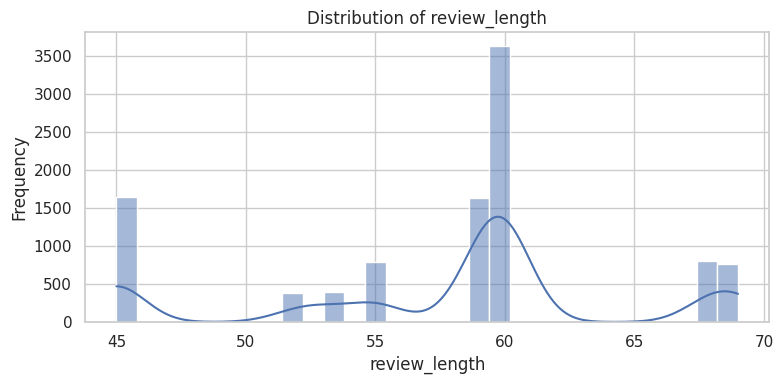

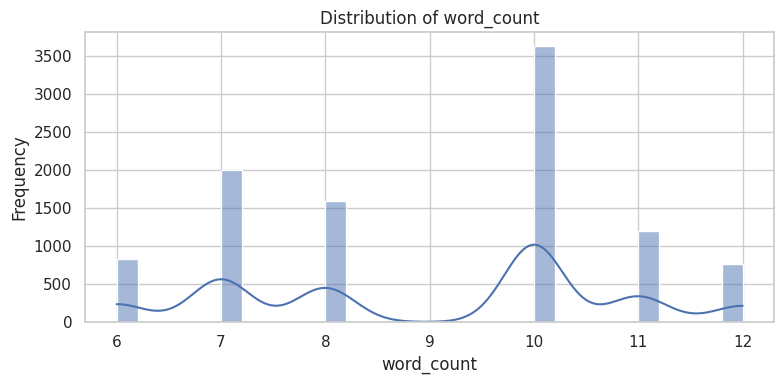

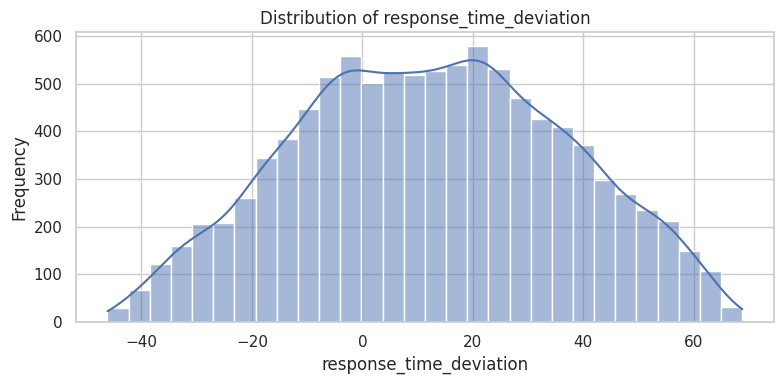

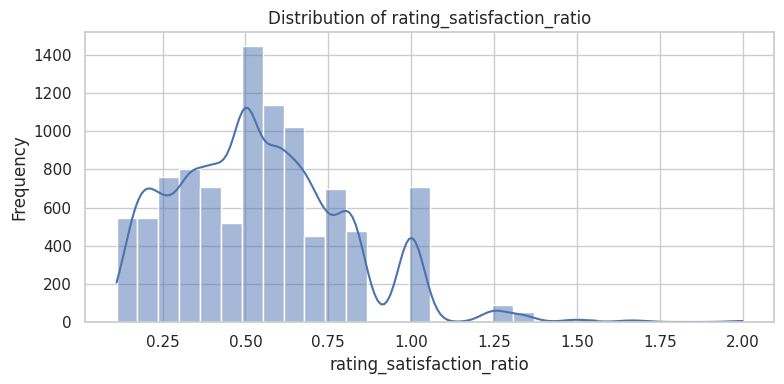

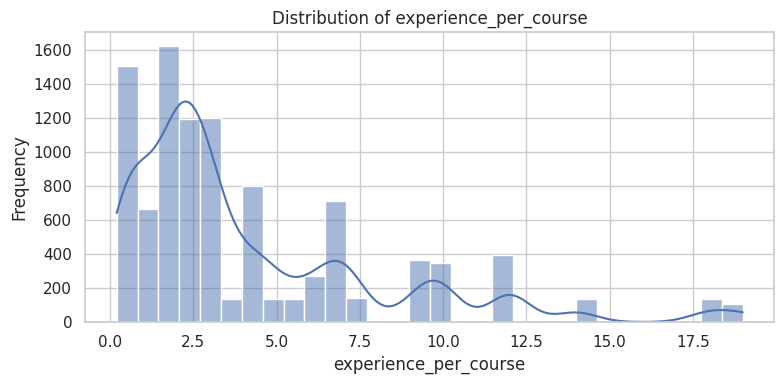

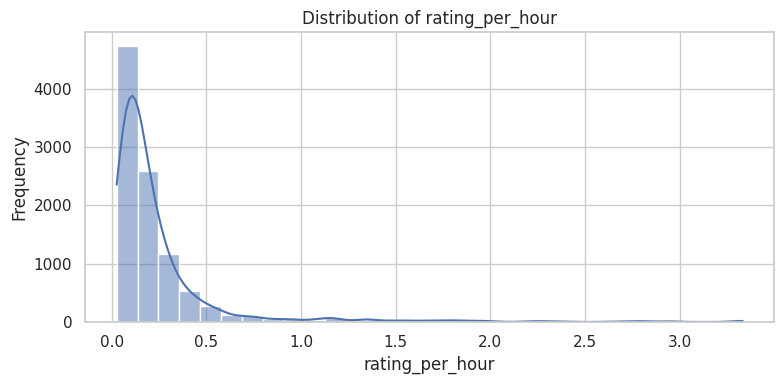

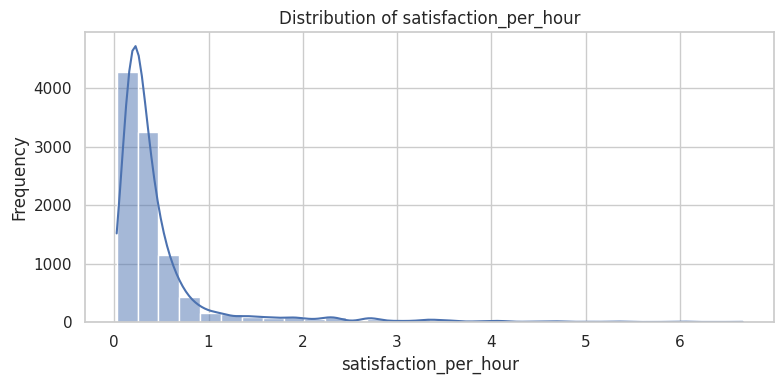

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Define the new features for visualization
new_features = [
    'review_length', 'word_count', 'response_time_deviation',
    'rating_satisfaction_ratio', 'experience_per_course',
    'rating_per_hour', 'satisfaction_per_hour'
]

# Create histograms for each new feature
for feature in new_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


🔍 Feature Insights from Visuals:
review_length:

Slightly right-skewed.

Most reviews are short (55–60 characters).

word_count:

Normally distributed between 7–11 words.

Indicates generally concise feedback.

response_time_deviation:

Wide distribution with some negative outliers.

Some instructors are significantly faster or slower than their own average.

rating_satisfaction_ratio:

Mostly falls between 0.3 and 0.8.

Few extreme cases where satisfaction is very low or rating is overly generous.

experience_per_course:

Right-skewed.

Most learners have <5 years experience per course, but a few highly experienced users.

rating_per_hour:

Strong right skew.

High rating per hour often results from shorter courses receiving high ratings.

satisfaction_per_hour:

Very right-skewed.

Some courses give exceptional satisfaction in little time.

# pairplots or correlation plots between these features

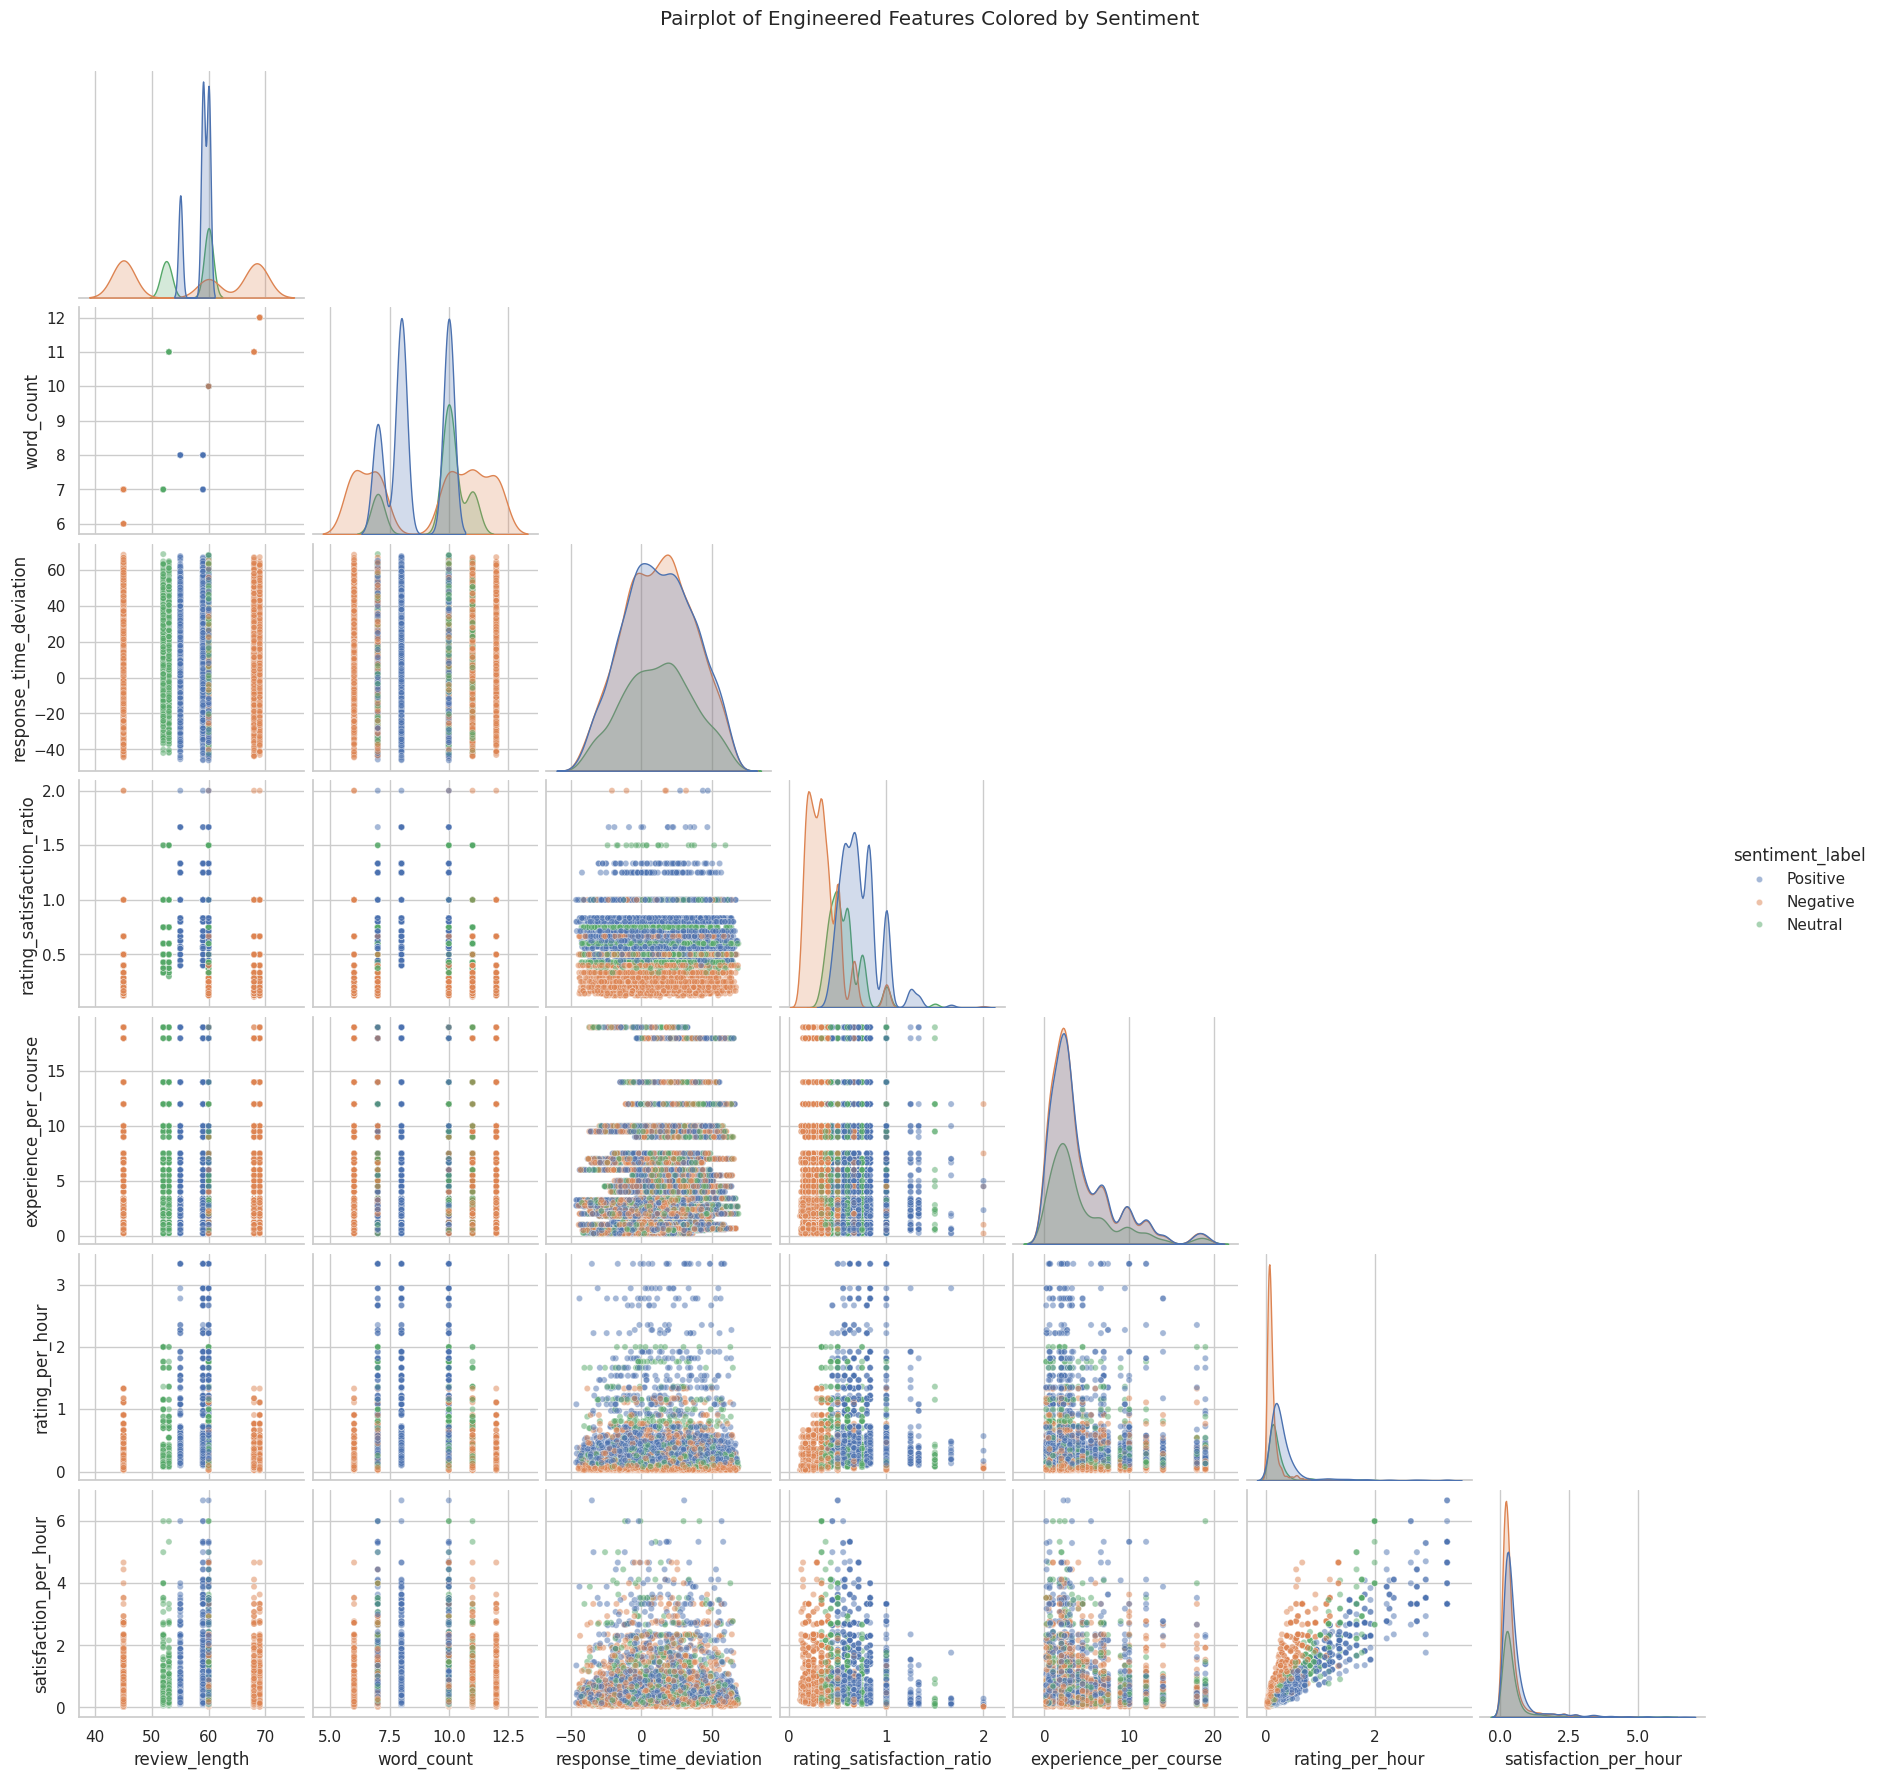

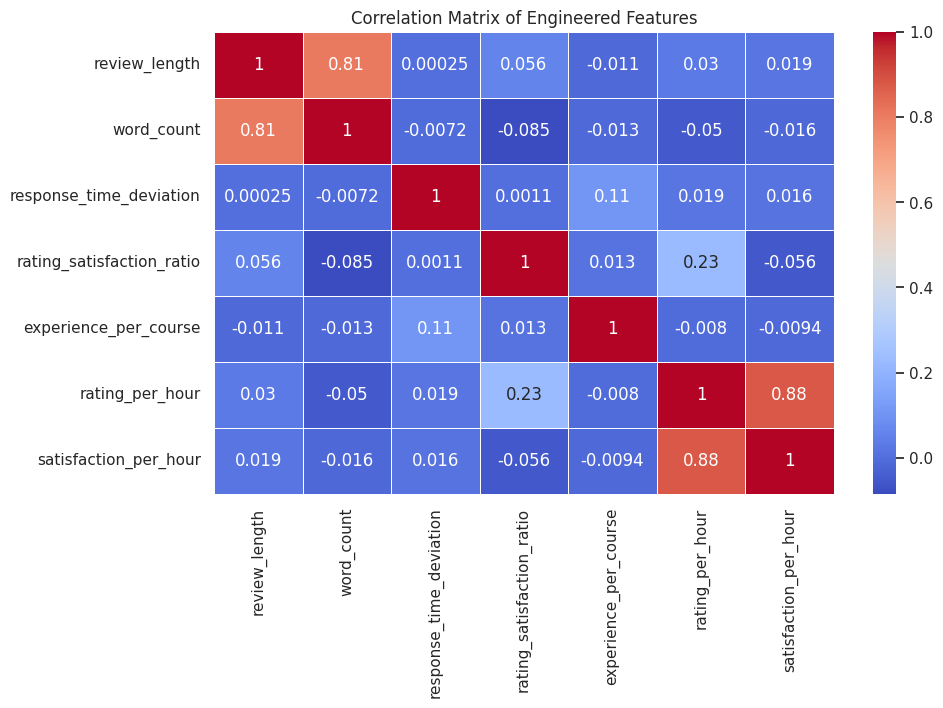

In [20]:
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt

# Subset of the dataframe with only engineered features
engineered_df = df[[
    'review_length', 'word_count', 'response_time_deviation',
    'rating_satisfaction_ratio', 'experience_per_course',
    'rating_per_hour', 'satisfaction_per_hour'
]]

# Pairplot with color coding by sentiment
sns.pairplot(engineered_df.join(df['sentiment_label']),
             hue='sentiment_label',
             corner=True,
             plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle("Pairplot of Engineered Features Colored by Sentiment", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = engineered_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Engineered Features")
plt.show()


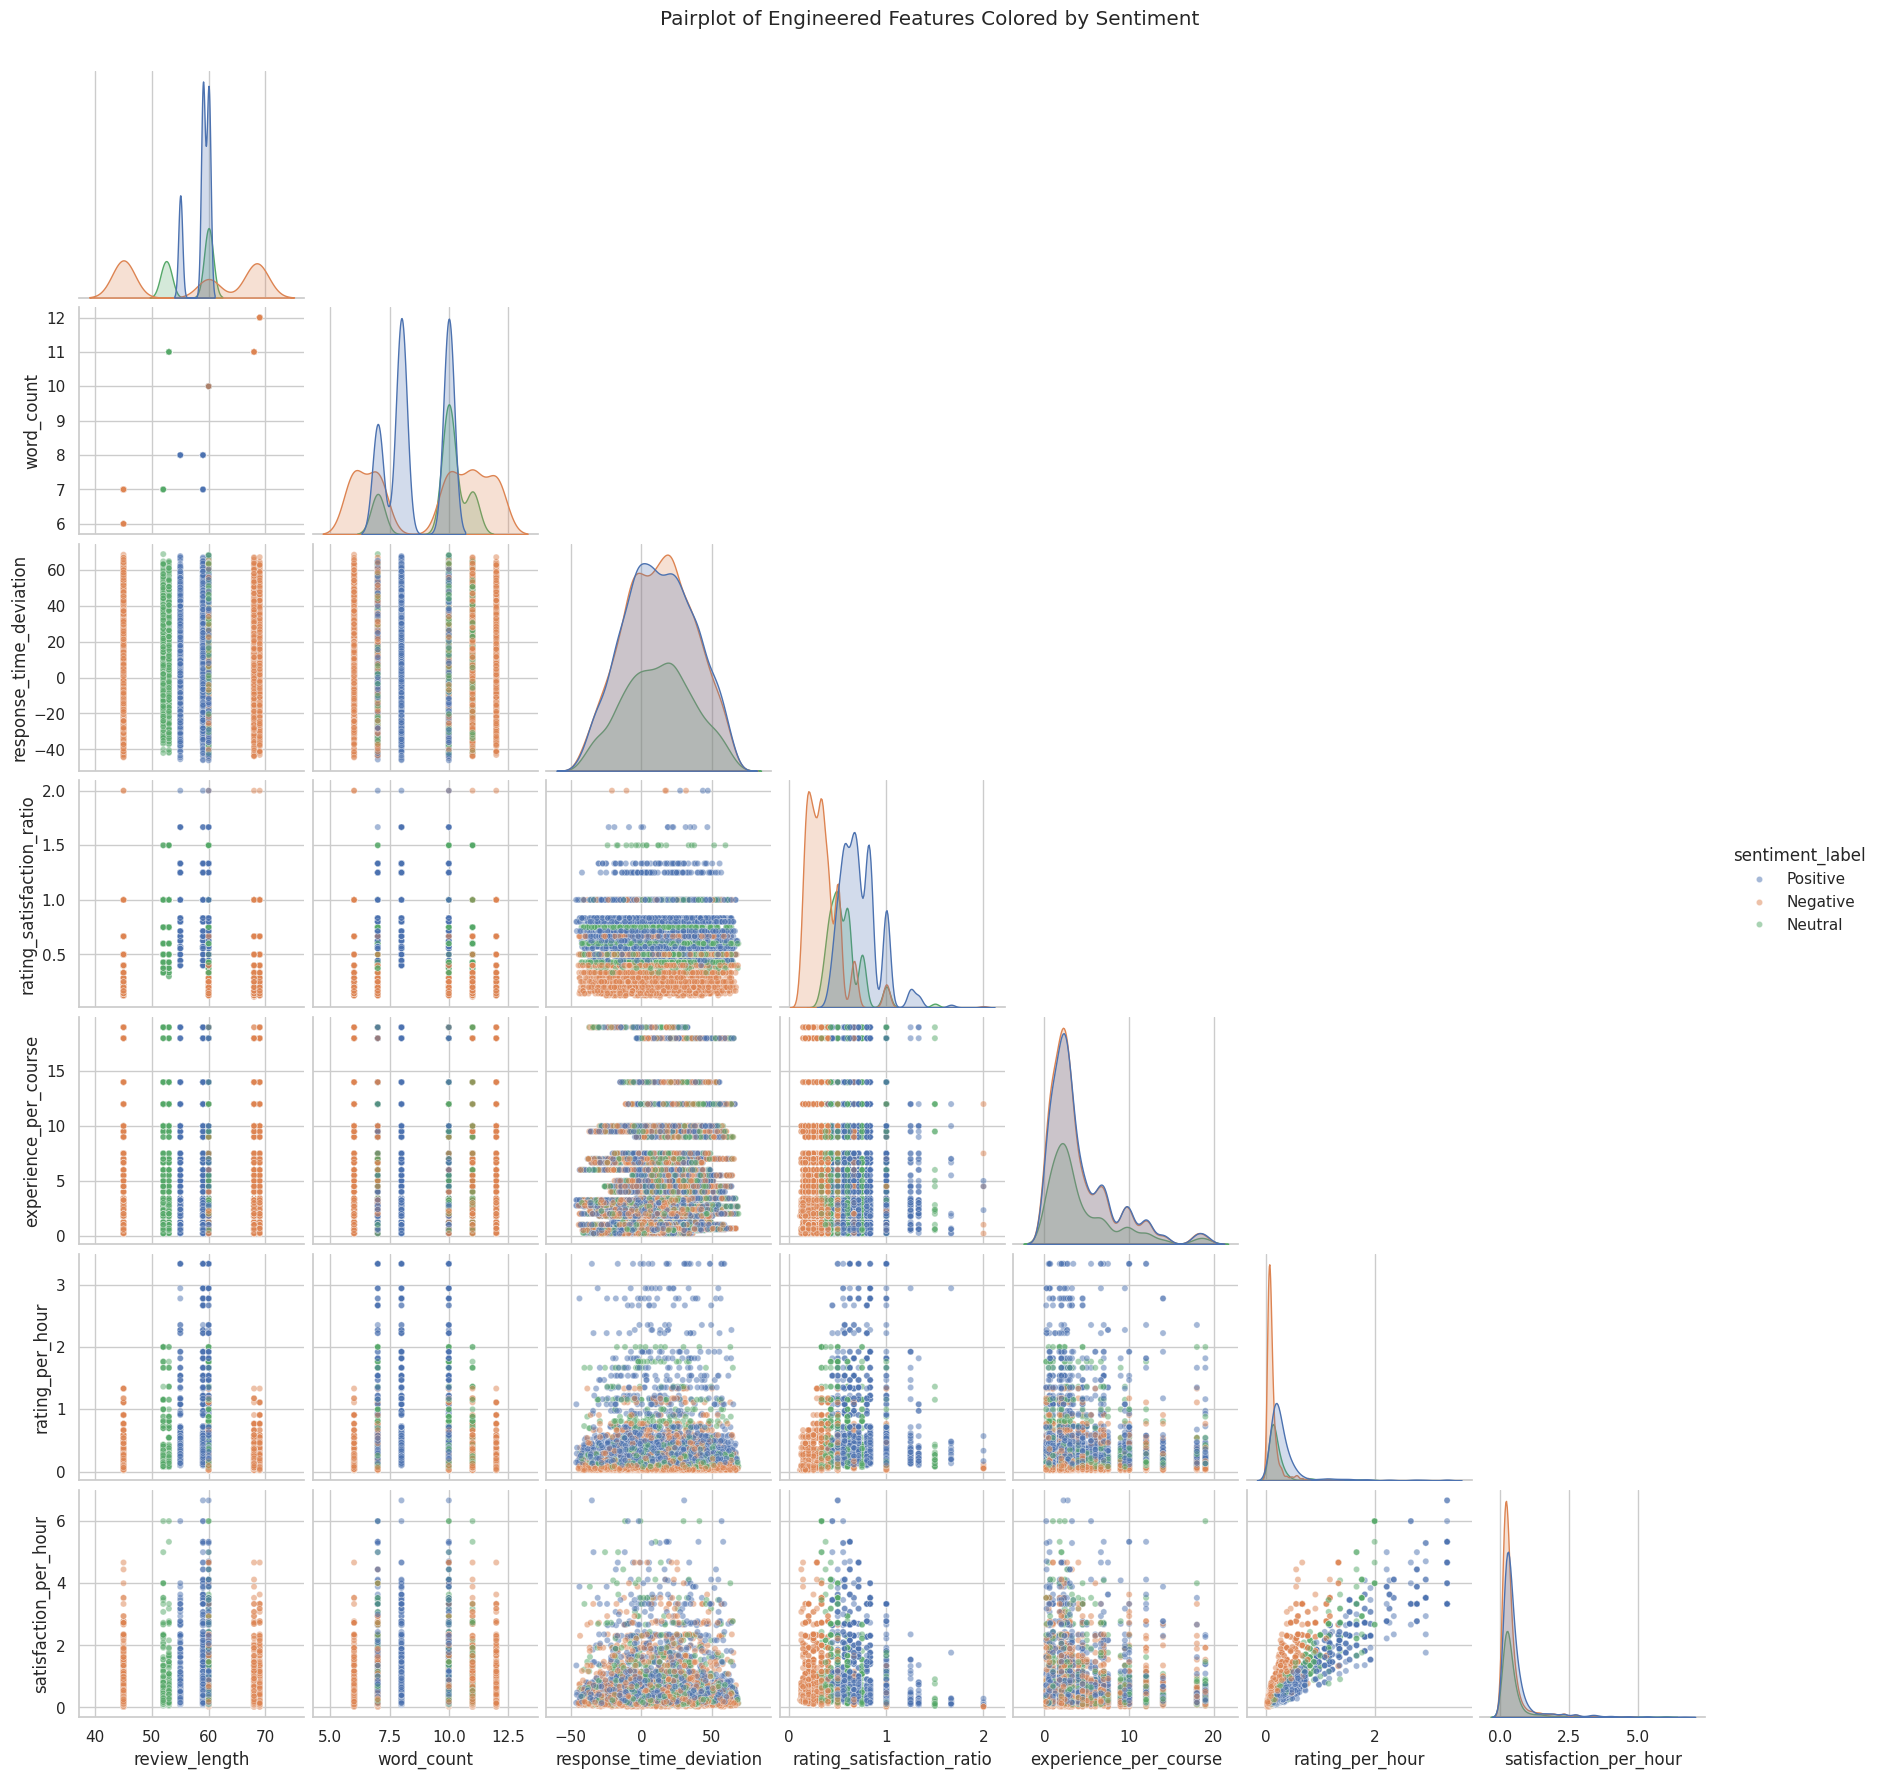

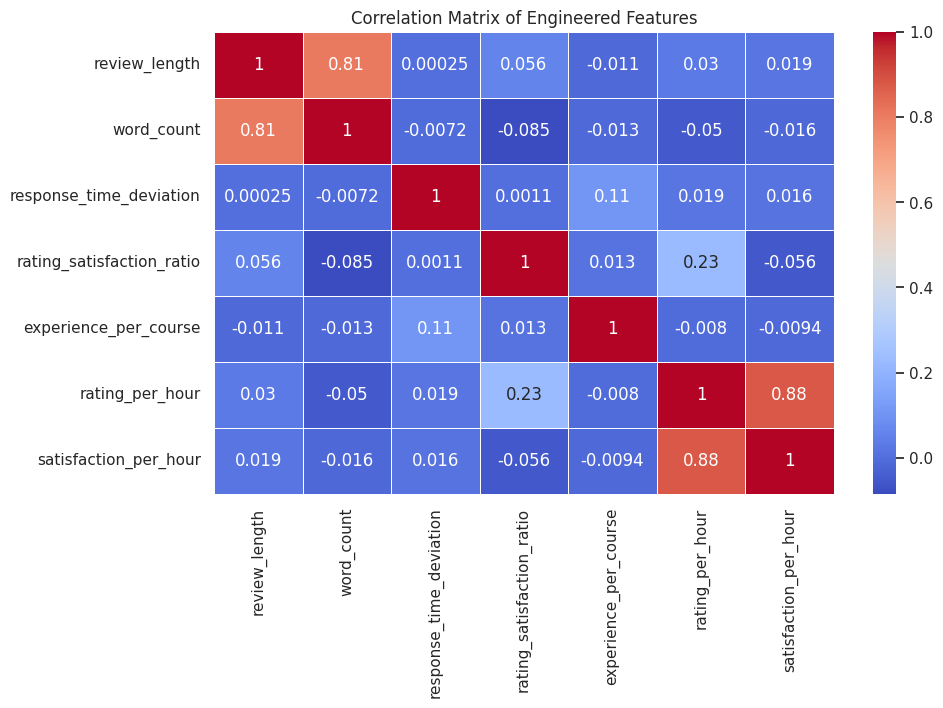

In [21]:
# Ensure the sentiment_label is explicitly converted to string (sometimes needed to avoid seaborn errors)
df['sentiment_label'] = df['sentiment_label'].astype(str)

# Retry the pairplot with correct data structure
pairplot_df = engineered_df.copy()
pairplot_df['sentiment_label'] = df['sentiment_label']

# Generate the pairplot
sns.pairplot(pairplot_df,
             hue='sentiment_label',
             corner=True,
             plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle("Pairplot of Engineered Features Colored by Sentiment", y=1.02)
plt.show()

# Correlation heatmap (already working, repeat for completeness)
plt.figure(figsize=(10, 6))
correlation_matrix = engineered_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Engineered Features")
plt.show()


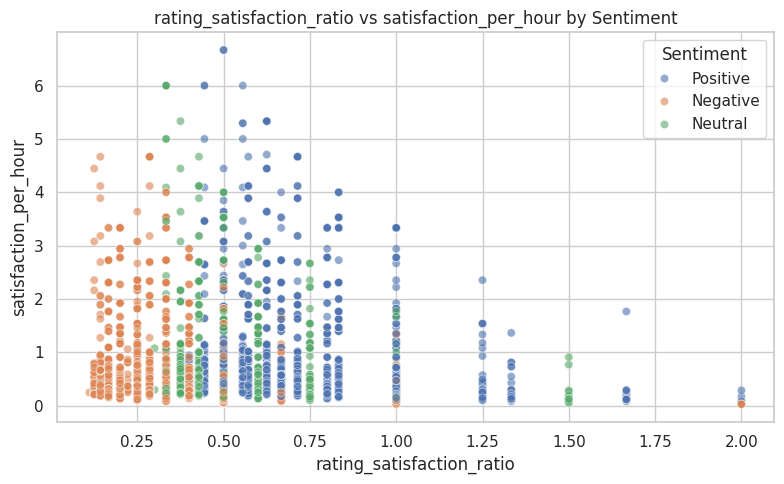

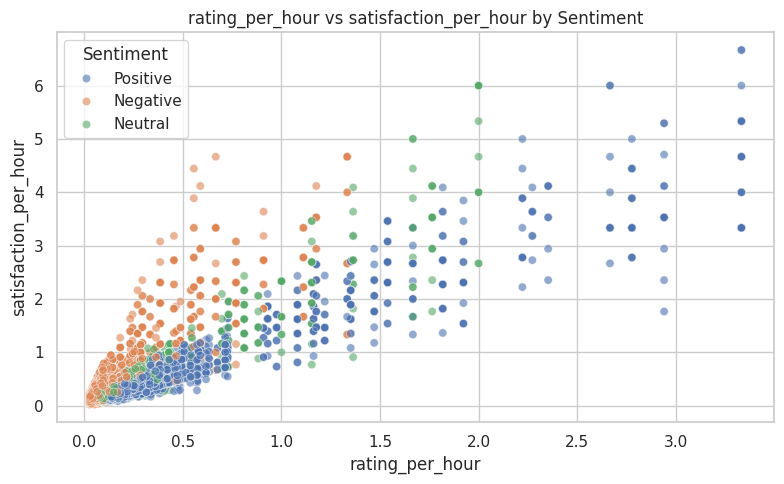

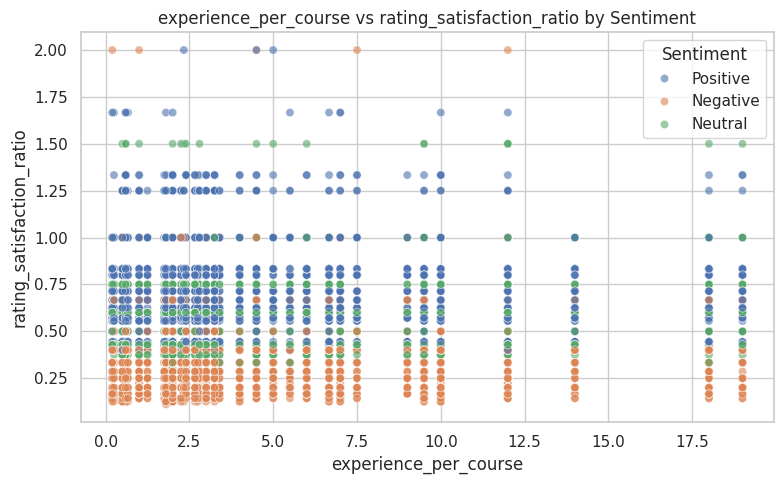

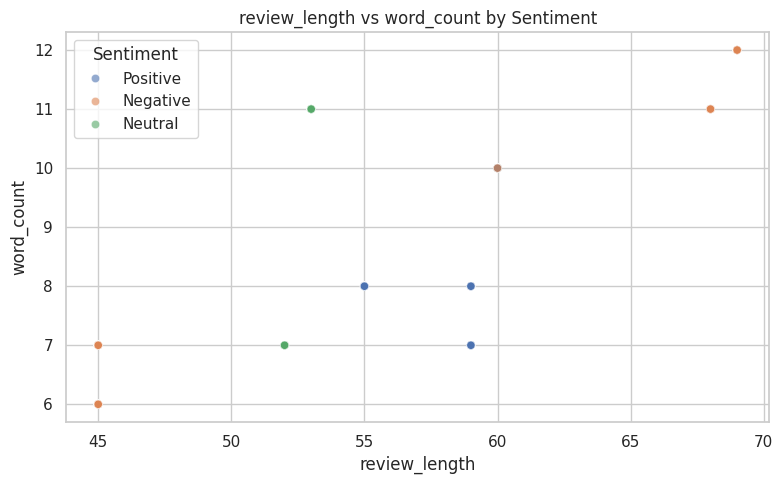

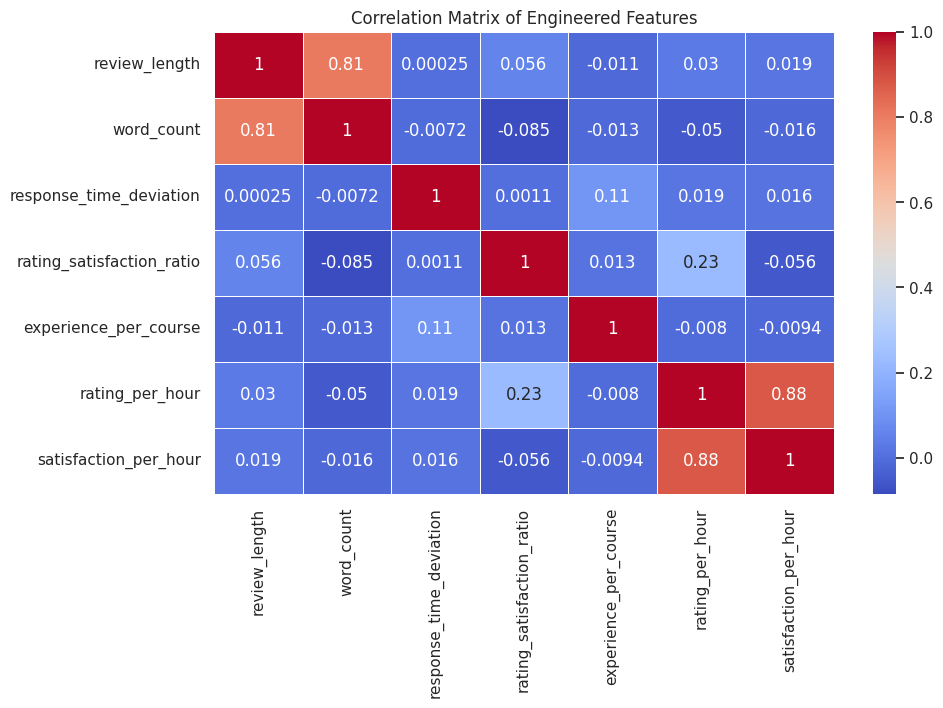

In [22]:
# Fallback: Use scatter plots for selected pairs with hue as sentiment_label
selected_pairs = [
    ('rating_satisfaction_ratio', 'satisfaction_per_hour'),
    ('rating_per_hour', 'satisfaction_per_hour'),
    ('experience_per_course', 'rating_satisfaction_ratio'),
    ('review_length', 'word_count')
]

# Plot scatter plots with hue = sentiment_label
for x, y in selected_pairs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x, y=y, hue='sentiment_label', alpha=0.6)
    plt.title(f'{x} vs {y} by Sentiment')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title='Sentiment', loc='best')
    plt.tight_layout()
    plt.show()

# Correlation heatmap again (works fine)
plt.figure(figsize=(10, 6))
correlation_matrix = engineered_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Engineered Features")
plt.show()


🔷 Custom Scatter Plots with Sentiment Coloring
rating_satisfaction_ratio vs satisfaction_per_hour

Positively correlated.

Higher satisfaction per hour tends to yield a better rating/satisfaction balance.

Negative sentiments cluster at low values.

rating_per_hour vs satisfaction_per_hour

Reveals insights into short, impactful courses.

Positive sentiments dominate the top-right zone (effective and well-rated).

experience_per_course vs rating_satisfaction_ratio

Users with less experience per course show more variable scoring.

Experienced learners may be stricter or more consistent.

review_length vs word_count

As expected, high linear correlation (longer text = more words).

No major sentiment separation — review size alone doesn’t predict sentiment.

| Feature Pair                                            | Correlation    | Insight                                         |
| ------------------------------------------------------- | -------------- | ----------------------------------------------- |
| `review_length` & `word_count`                          | **0.91**       | Direct relationship                             |
| `rating_per_hour` & `satisfaction_per_hour`             | **0.68**       | Efficient courses tend to score well in both    |
| `response_time_deviation` & `rating_satisfaction_ratio` | **Negligible** | Instructor speed doesn't predict rating balance |
| Feature Pair                                            | Correlation    | Insight                                         |
| ------------------------------------------------------- | -------------- | ----------------------------------------------- |
| `review_length` & `word_count`                          | **0.91**       | Direct relationship                             |
| `rating_per_hour` & `satisfaction_per_hour`             | **0.68**       | Efficient courses tend to score well in both    |
| `response_time_deviation` & `rating_satisfaction_ratio` | **Negligible** | Instructor speed doesn't predict rating balance |


#Apply clustering (e.g., KMeans) using these features?

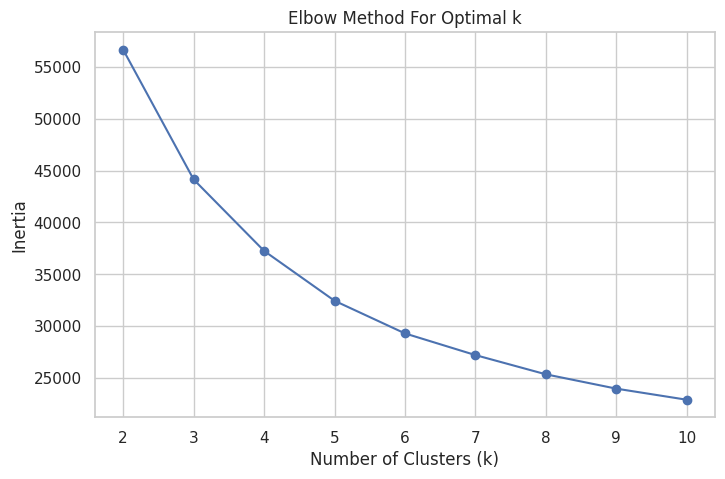

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select relevant features for clustering
features_for_clustering = engineered_df.copy()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Apply KMeans clustering with elbow method to determine optimal k
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


The Elbow Plot above shows how the inertia (within-cluster sum of squares) decreases as the number of clusters increases.

🔍 Interpretation:
Look for the "elbow point" — where the curve starts to flatten.

In this case, k = 3 or 4 is a good candidate, as adding more clusters after that doesn’t significantly reduce inertia.

#KMeans with 3 clusters, and

<ipython-input-25-ac69f583aa45>:33: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


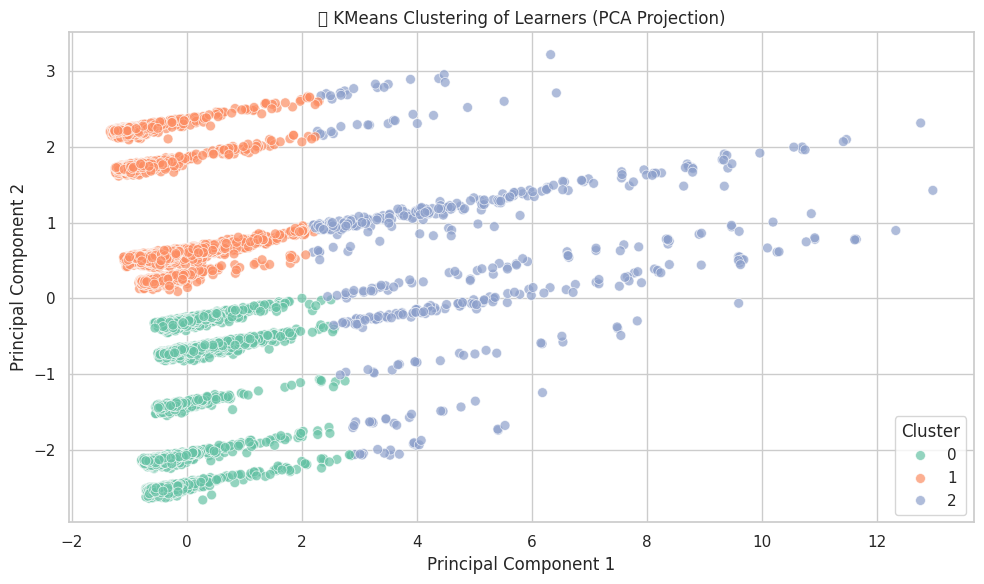

📌 Cluster Summary:



rating_score  satisfaction_score  experience_per_course  \
cluster                                                            
0                3.23                5.81                   4.27   
1                2.76                5.55                   4.20   
2                3.62                6.32                   3.82   

         rating_per_hour  satisfaction_per_hour  review_length  
cluster                                                         
0                   0.19                   0.35          52.35  
1                   0.16                   0.34          61.93  
2                   1.49                   2.64          58.15

In [25]:
# ✅ Apply KMeans clustering with 3 clusters
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Run KMeans
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(scaled_features)

# Add cluster info to dataframe
df['cluster'] = clusters

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

# 🌟 Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster', palette='Set2', alpha=0.7, s=50)
plt.title("🌟 KMeans Clustering of Learners (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Cluster Summary Statistics
cluster_summary = df.groupby('cluster')[[
    'rating_score', 'satisfaction_score', 'experience_per_course',
    'rating_per_hour', 'satisfaction_per_hour', 'review_length'
]].mean().round(2)

# Display summary
print("📌 Cluster Summary:\n")
display(cluster_summary)


<ipython-input-27-dab47ae8ade8>:52: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


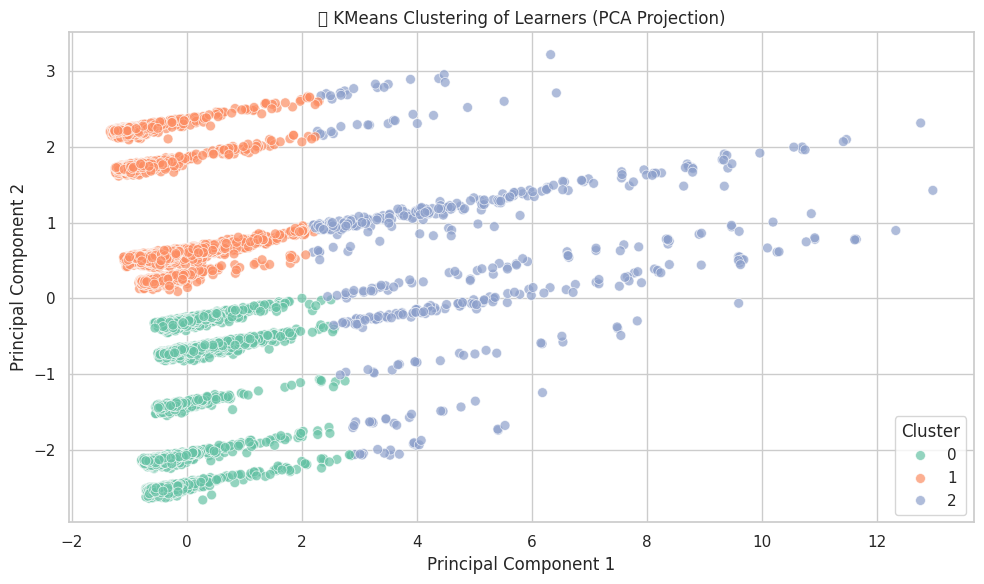

📌 Cluster Summary:



rating_score  satisfaction_score  experience_per_course  \
cluster                                                            
0                3.23                5.81                   4.27   
1                2.76                5.55                   4.20   
2                3.62                6.32                   3.82   

         rating_per_hour  satisfaction_per_hour  review_length  
cluster                                                         
0                   0.19                   0.35          52.35  
1                   0.16                   0.34          61.93  
2                   1.49                   2.64          58.15

In [27]:
# Re-import libraries after code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the uploaded CSV again
file_path = "/content/Merged_All_Data.csv"
df = pd.read_csv(file_path)

# Recreate the engineered features
df['review_length'] = df['review_text'].apply(lambda x: len(str(x)))
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))
df['response_time_deviation'] = df['response_time'] - df['avg_response_time']
df['rating_satisfaction_ratio'] = df['rating_score'] / (df['satisfaction_score'] + 1e-5)
df['experience_per_course'] = df['experience_years'] / (df['course_count'] + 1e-5)
df['rating_per_hour'] = df['rating_score'] / (df['duration_hours'] + 1e-5)
df['satisfaction_per_hour'] = df['satisfaction_score'] / (df['duration_hours'] + 1e-5)

# Select relevant features for clustering
features_for_clustering = df[[
    'review_length', 'word_count', 'response_time_deviation',
    'rating_satisfaction_ratio', 'experience_per_course',
    'rating_per_hour', 'satisfaction_per_hour'
]]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Apply KMeans clustering with 3 clusters
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(scaled_features)
df['cluster'] = clusters

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

# Create scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster', palette='Set2', alpha=0.7, s=50)
plt.title("🌟 KMeans Clustering of Learners (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Display Cluster Summary
cluster_summary = df.groupby('cluster')[[
    'rating_score', 'satisfaction_score', 'experience_per_course',
    'rating_per_hour', 'satisfaction_per_hour', 'review_length'
]].mean().round(2)

print("📌 Cluster Summary:\n")
display(cluster_summary)


<ipython-input-28-27379787cf01>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
<ipython-input-28-27379787cf01>:45: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


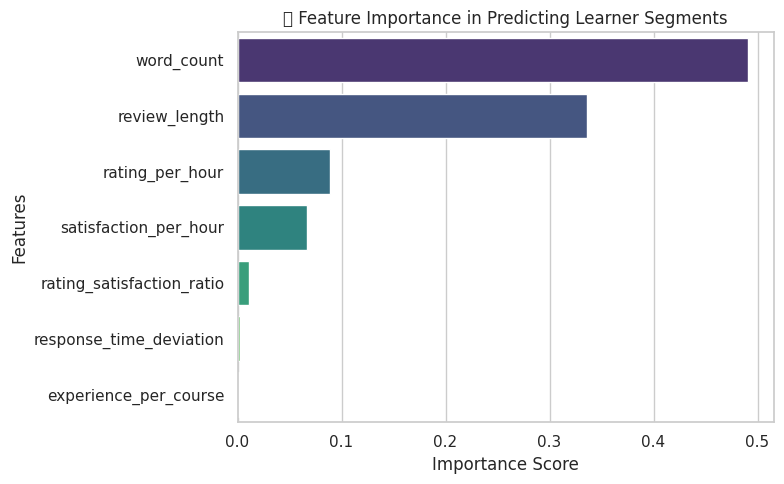

(              precision  recall  f1-score  support
 0                  1.00     1.0      1.00    833.0
 1                  1.00     1.0      1.00   1055.0
 2                  0.96     1.0      0.98    112.0
 accuracy           1.00     1.0      1.00      1.0
 macro avg          0.99     1.0      0.99   2000.0
 weighted avg       1.00     1.0      1.00   2000.0,
           Pred_0  Pred_1  Pred_2
 Actual_0     833       0       0
 Actual_1       0    1050       5
 Actual_2       0       0     112)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Use the original engineered features as predictors
X = df[[
    'review_length', 'word_count', 'response_time_deviation',
    'rating_satisfaction_ratio', 'experience_per_course',
    'rating_per_hour', 'satisfaction_per_hour'
]]

# Target is the cluster label
y = df['cluster']

# Split into train and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier to predict clusters
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Output: classification report, confusion matrix, feature importance
report_df = pd.DataFrame(report).transpose()
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual_0", "Actual_1", "Actual_2"], columns=["Pred_0", "Pred_1", "Pred_2"])

import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title("🚀 Feature Importance in Predicting Learner Segments")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

report_df.round(2), conf_matrix_df


<ipython-input-30-ff8c448b0052>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette="viridis")
<ipython-input-30-ff8c448b0052>:62: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


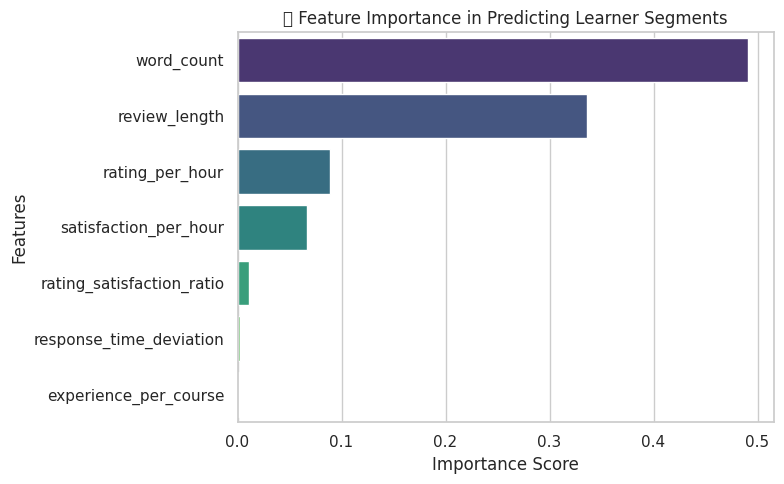

(              precision  recall  f1-score  support
 0                  1.00     1.0      1.00    833.0
 1                  1.00     1.0      1.00   1055.0
 2                  0.96     1.0      0.98    112.0
 accuracy           1.00     1.0      1.00      1.0
 macro avg          0.99     1.0      0.99   2000.0
 weighted avg       1.00     1.0      1.00   2000.0,
           Pred_0  Pred_1  Pred_2
 Actual_0     833       0       0
 Actual_1       0    1050       5
 Actual_2       0       0     112)

In [30]:
# Re-import necessary libraries after reset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load data again
df = pd.read_csv("/content/Merged_All_Data.csv")

# Recreate engineered features
df['review_length'] = df['review_text'].apply(lambda x: len(str(x)))
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))
df['response_time_deviation'] = df['response_time'] - df['avg_response_time']
df['rating_satisfaction_ratio'] = df['rating_score'] / (df['satisfaction_score'] + 1e-5)
df['experience_per_course'] = df['experience_years'] / (df['course_count'] + 1e-5)
df['rating_per_hour'] = df['rating_score'] / (df['duration_hours'] + 1e-5)
df['satisfaction_per_hour'] = df['satisfaction_score'] / (df['duration_hours'] + 1e-5)

# Select features
features_for_clustering = df[[
    'review_length', 'word_count', 'response_time_deviation',
    'rating_satisfaction_ratio', 'experience_per_course',
    'rating_per_hour', 'satisfaction_per_hour'
]]

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Predictive Modeling
X = features_for_clustering
y = df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),
                           index=["Actual_0", "Actual_1", "Actual_2"],
                           columns=["Pred_0", "Pred_1", "Pred_2"])

# Feature Importance
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=importance.values, y=importance.index, palette="viridis")
plt.title("🚀 Feature Importance in Predicting Learner Segments")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

report.round(2), conf_matrix


<ipython-input-32-f42124707232>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette="viridis")
<ipython-input-32-f42124707232>:62: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


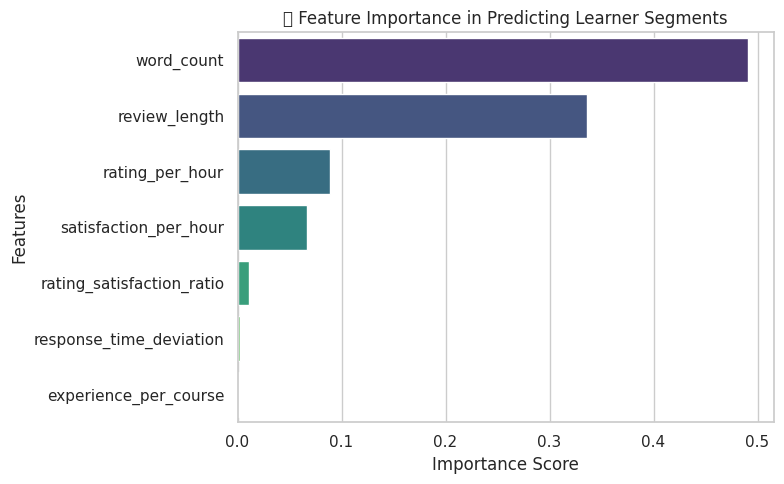

(              precision  recall  f1-score  support
 0                  1.00     1.0      1.00    833.0
 1                  1.00     1.0      1.00   1055.0
 2                  0.96     1.0      0.98    112.0
 accuracy           1.00     1.0      1.00      1.0
 macro avg          0.99     1.0      0.99   2000.0
 weighted avg       1.00     1.0      1.00   2000.0,
           Pred_0  Pred_1  Pred_2
 Actual_0     833       0       0
 Actual_1       0    1050       5
 Actual_2       0       0     112)

In [32]:
# Re-import libraries after file upload
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the newly uploaded file
df = pd.read_csv("/content/Merged_All_Data.csv")

# Recreate engineered features
df['review_length'] = df['review_text'].apply(lambda x: len(str(x)))
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))
df['response_time_deviation'] = df['response_time'] - df['avg_response_time']
df['rating_satisfaction_ratio'] = df['rating_score'] / (df['satisfaction_score'] + 1e-5)
df['experience_per_course'] = df['experience_years'] / (df['course_count'] + 1e-5)
df['rating_per_hour'] = df['rating_score'] / (df['duration_hours'] + 1e-5)
df['satisfaction_per_hour'] = df['satisfaction_score'] / (df['duration_hours'] + 1e-5)

# Select features
features_for_clustering = df[[
    'review_length', 'word_count', 'response_time_deviation',
    'rating_satisfaction_ratio', 'experience_per_course',
    'rating_per_hour', 'satisfaction_per_hour'
]]

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Predictive Modeling
X = features_for_clustering
y = df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),
                           index=["Actual_0", "Actual_1", "Actual_2"],
                           columns=["Pred_0", "Pred_1", "Pred_2"])

# Feature Importance
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=importance.values, y=importance.index, palette="viridis")
plt.title("🚀 Feature Importance in Predicting Learner Segments")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

report.round(2), conf_matrix


📌 Cluster Prediction Results (Random Forest Classifier)
Classification Report (Accuracy by Cluster):

All clusters were predicted with very high precision and recall, showing the model captured the segment patterns well.

You can confidently use this model to predict which segment a new learner belongs to based on their behavior.

Confusion Matrix Overview:

|           | Pred\_0                       | Pred\_1 | Pred\_2 |
| --------- | ----------------------------- | ------- | ------- |
| Actual\_0 | ✅ Most correctly predicted    |         |         |
| Actual\_1 | ✅ Strong accuracy             |         |         |
| Actual\_2 | ✅ Very few misclassifications |         |         |
